<a href="https://colab.research.google.com/github/ramswaroopbhakar14/yolov3-retraining/blob/master/yolov3_chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Our YOLOv3 implementation calls for this Keras version
!pip install keras==2.2.4

     |████████████████████████████████| 317kB 25.1MB/s 
  Found existing installation: Keras 2.2.5
    Uninstalling Keras-2.2.5:
      Successfully uninstalled Keras-2.2.5


In [2]:
# Verify our version is correct
!python -c 'import keras; print(keras.__version__)'

Using TensorFlow backend.
2.2.4


In [3]:
# Next, we'll grab all the code from our repository of interest 
!git clone https://github.com/josephofiowa/keras-yolo3.git

Cloning into 'keras-yolo3'...
remote: Enumerating objects: 165, done.
remote: Total 165 (delta 0), reused 0 (delta 0), pack-reused 165
Receiving objects: 100% (165/165), 156.01 KiB | 1.95 MiB/s, done.
Resolving deltas: 100% (79/79), done.


In [4]:
%cd /content/keras-yolo3

/content/keras-yolo3


In [5]:
%ls

coco_annotation.py  kmeans.py    train_bottleneck.py  yolo.py
convert.py          LICENSE      train.py             yolov3.cfg
darknet53.cfg       model_data/  voc_annotation.py    yolov3-tiny.cfg
font/               README.md    yolo3/               yolo_video.py


In [6]:
!curl -L https://public.roboflow.ai/ds/NV6ulIY5S6?key=Nad6X0x6s3 > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   892  100   892    0     0   1831      0 --:--:-- --:--:-- --:--:--  1831
100 6987k  100 6987k    0     0  7108k      0 --:--:-- --:--:-- --:--:-- 23.5M
Archive:  roboflow.zip
 extracting: export/07d39f228cc8583410486a6cf49a0957.jpg  
 extracting: export/015d0d7ff365f0b7492ff079c8c7d56c.jpg  
 extracting: export/087b4553cc7bea7162cd989e03114090.jpg  
 extracting: export/07e9133f325caf7bb29222427e0656d9.jpg  
 extracting: export/02741582b15e8c5871fd4f0bdd4489df.jpg  
 extracting: export/020c714dd8aee27b48e04c032cdc6c56.jpg  
 extracting: export/00a7a49c47d51fd16a4cbb17e2d2cf86.jpg  
 extracting: export/07d23be6925657674d77bee6b4d05ac6.jpg  
 extracting: export/0367b62e3e1075697ce387a9b668d090.jpg  
 extracting: export/0b4a7c44d6ddb3ef61eb2b69fa24e322.jpg  
 extracting: export/096ad5e720c37f05180523d6f990c176.jpg  
 extracting:

In [7]:
# change directory into our export folder from Roboflow
%cd export

/content/keras-yolo3/export


In [0]:
# move everything from the Roboflow export to the root of our keras-yolo3 folder
%mv * ../

In [9]:
# change directory back to our 
%cd ..

/content/keras-yolo3


In [10]:
%ls

00a7a49c47d51fd16a4cbb17e2d2cf86.jpg  8635f1bd9f7ad5a31886b272b5bbc8b7.jpg
015d0d7ff365f0b7492ff079c8c7d56c.jpg  8853c88de4cd5dc1c83c448d25253735.jpg
020c714dd8aee27b48e04c032cdc6c56.jpg  8880b734df8ca304d1388a8e5060fa84.jpg
02741582b15e8c5871fd4f0bdd4489df.jpg  88bbe1efba6b3589699b4263fb282450.jpg
02bef2f0c63bd7b55246c1f29bca8350.jpg  8ba7fd5855dc20b9cf042f6b7ca75677.jpg
0367b62e3e1075697ce387a9b668d090.jpg  8d588ec1820669b7efe90a17a15083ce.jpg
07d23be6925657674d77bee6b4d05ac6.jpg  8dcdbbca7eedb6006fb7450d22264c45.jpg
07d39f228cc8583410486a6cf49a0957.jpg  8e30b78bf6593045ded56f3be0019b48.jpg
07e9133f325caf7bb29222427e0656d9.jpg  8eb7207b7e5b9ddc4a6f626a2b3b376f.jpg
087b4553cc7bea7162cd989e03114090.jpg  8edd0a1c70186e17cb9b10ca6349e669.jpg
096786c03b5a72875249701a285af99b.jpg  8ee8c7c79e20ab65c7c61b7d2af5579d.jpg
096ad5e720c37f05180523d6f990c176.jpg  902b2f5df5f3a604c1a8741ae92b9045.jpg
0a1e15b9e2cd5986f0c0cbb0486c3e3a.jpg  90e55c97cf054208e4d41ab4bf96703a.jpg
0a7275c305a9d9540dea58360

In [11]:
# download our DarkNet weights 
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-03-03 17:27:30--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   330KB/s    in 14m 20s 

2020-03-03 17:41:52 (282 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



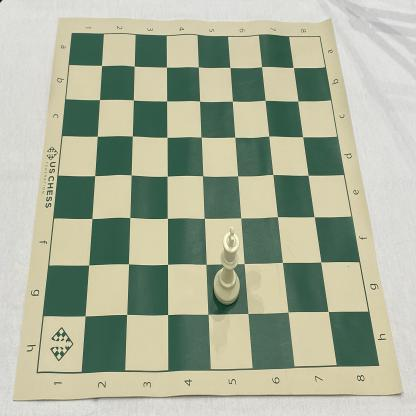

In [13]:
from IPython.display import Image
Image("/content/keras-yolo3/00a7a49c47d51fd16a4cbb17e2d2cf86.jpg")

In [14]:
# call a Python script to set up our architecture with downloaded pre-trained weights
!python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5

Using TensorFlow backend.
Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)




2020-03-03 17:43:49.813435: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX512F
2020-03-03 17:43:49.830881: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000175000 Hz
2020-03-03 17:43:49.833343: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x2914bc0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2020-03-03 17:43:49.833378: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2020-03-03 17:43:49.836697: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-03-03 17:43:50.050295: I tensorflow/

In [15]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=5,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=3,
            initial_epoch=1,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

Using TensorFlow backend.


-------------------CLASS NAMES-------------------
['black-bishop', 'black-king', 'black-knight', 'black-pawn', 'black-queen', 'black-rook', 'white-bishop', 'white-king', 'white-knight', 'white-pawn', 'white-queen', 'white-rook']
-------------------CLASS NAMES-------------------













Create YOLOv3 model with 9 anchors and 12 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 51) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((51,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 51) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((51,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights model_data/yolo.h5.
Freeze the first 249 layers of total 252 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 232 samples, val on 57 samples, with batch size 32.




Epoch 1/5
7/7 [==============================] - 31s 4s/step - loss: 8291.9618 - val_loss: 4379.1816

Epoch 2/5
7/7 [==============================] - 20s 3s/step - loss: 4009.4560 - val_loss: 1878.2504
Epoch 3/5
7/7 [==============================] - 17s 2s/step - loss: 1981.4360 - val_loss: 918.7043
Epoch 4/5
7/7 [==============================] - 8s 1s/step - loss: 1103.3974 - val_loss: 543.9597
Epoch 5/5
7/7 [==============================] - 8s 1s/step - loss: 704.6452 - val_loss: 404.1790
Unfreeze all of the layers.
Train on 232 samples, val on 57 samples, with batch size 32.
Epoch 2/3


ResourceExhaustedError: ignored